# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

# 2. Importing Dataset

In [2]:
df= pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Exploratory Data Analysis

In [3]:
df.shape

(907, 27)

Rows : 907<br>
Columns : 27

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

1. There are null values present in the dataset<br>
2. Object Datatype : 12 columns<br>
3. Float Datatype : 15 columns<br>
4. other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh : 0 non-null count. Means every entry is either missing or empty.<br>
5. other_fuel2 has only 1 non-null row, so we can drop that column as well.

In [5]:
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'], axis=1, inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have dropped NaN columns and now column count has been reduced to 21

In [6]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [7]:
# we will check object columns present in current dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [8]:
# To check the unique values in each columns
df.nunique().to_frame('No. of Unique values')

,No. of Unique values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
commissioning_year,73


We can drop below columns for following reasons:<br>
1. country - only 1 unique value, means all the rows has same <br>
2. country_long - only 1 unique value, means all the rows has same <br>
3. name - all the rows have unique values<br>
4. gppd_idnr - all the rows have unique values<br>
5. year_of_capacity_data - all the rows have unique values<br>
6. generation_data_source - all the rows have unique values<br>

In [9]:
# We can drop Column 'name' and Column 'gppd_idnr' as well, since all the values are unique in it
df.drop(['country','country_long','name','gppd_idnr','year_of_capacity_data','generation_data_source'], axis=1, inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [10]:
#We will check unique value and the occurence of unique values in the columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype

There is no blank spaces present in the data as well

In [11]:
# To check the null values present in the dataset
df.isnull().sum()

# Null Values exists in the data set and we will use Simple IMputer to fill the null values.

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [12]:
#We have null value in many columns. We will use SimpleImputer to fill NaN values as per their datatype

from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan, strategy='mean')
list1=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
imp2=SimpleImputer(missing_values=np.nan, strategy='median')
list2=['latitude','longitude','commissioning_year']
imp3=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
list3=['other_fuel1','owner','geolocation_source']

In [13]:
for i in list1:
    df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))
for i in list2:
    df[i]=imp2.fit_transform(df[i].values.reshape(-1,1))
for i in list3:
    df[i]=imp3.fit_transform(df[i].values.reshape(-1,1))

In [14]:
#To check if all the non null count is filled now.
df.info()

# All the null values are now filled.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          907 non-null    object 
 5   commissioning_year   907 non-null    float64
 6   owner                907 non-null    object 
 7   source               907 non-null    object 
 8   url                  907 non-null    object 
 9   geolocation_source   907 non-null    object 
 10  generation_gwh_2014  907 non-null    float64
 11  generation_gwh_2015  907 non-null    float64
 12  generation_gwh_2016  907 non-null    float64
 13  generation_gwh_2017  907 non-null    float64
 14  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [15]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,Oil,2001.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [16]:
# Using Label Encoder to convert into numerical columns
from sklearn.preprocessing import LabelEncoder
encoded_list=['primary_fuel','other_fuel1','owner','source','url','geolocation_source']
LE= LabelEncoder()
for i in encoded_list:
    df[i]=LE.fit_transform(df[i].astype(str))

In [17]:
#Using astype to convert into 'int64' type
for i in encoded_list:
    df[i]=LE.fit_transform(df[i].astype('int64'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int64  
 4   other_fuel1          907 non-null    int64  
 5   commissioning_year   907 non-null    float64
 6   owner                907 non-null    int64  
 7   source               907 non-null    int64  
 8   url                  907 non-null    int64  
 9   geolocation_source   907 non-null    int64  
 10  generation_gwh_2014  907 non-null    float64
 11  generation_gwh_2015  907 non-null    float64
 12  generation_gwh_2016  907 non-null    float64
 13  generation_gwh_2017  907 non-null    float64
 14  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int64(6)
memory usage: 10

In [18]:
# To move target column to the beginning of the dataset

target_column=df.pop('primary_fuel')
df.insert(0, 'primary_fuel', target_column)

In [19]:
# We will check for the unique values again here
df.nunique().to_frame("No.of Unique count")

,No.of Unique count
primary_fuel,8
capacity_mw,361
latitude,836
longitude,827
other_fuel1,3
commissioning_year,73
owner,280
source,191
url,304
geolocation_source,3


# 4. Description of Dataset

In [20]:
df.describe()

,primary_fuel,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,3.206174,326.223755,21.227439,77.427103,1.995590,1998.728776,56.169791,43.847850,94.469680,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,2.280652,590.085456,6.080491,4.815073,0.081259,13.158621,82.529116,44.642818,70.381222,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.725000,17.072000,74.388900,2.000000,1998.000000,5.000000,22.000000,58.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,3.000000,59.200000,21.780000,76.719500,2.000000,2001.000000,5.000000,22.000000,58.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,6.000000,385.250000,25.176450,79.206100,2.000000,2003.000000,95.500000,29.500000,115.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,7.000000,4760.000000,34.649000,95.408000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Summary:<br>
1. Mean~Median : primary_fuel, latitude, longitude, other_fuel1, commissioning_year, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018<br>
2. Mean>Median : capacity_mw, owner, source, url <br>
3. Count is equal in all columns<br>
4. Difference between 3rd quartile and Max value(Presence of possible Outliers) : <br>
a. High outliers : capacity_mw, owner, source, url, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017,	generation_gwh_2018<br>
b. low outliers :latitude, longitude, commissioning_year

# 5. Data Visualization

## 5.1 Univariate Analysis

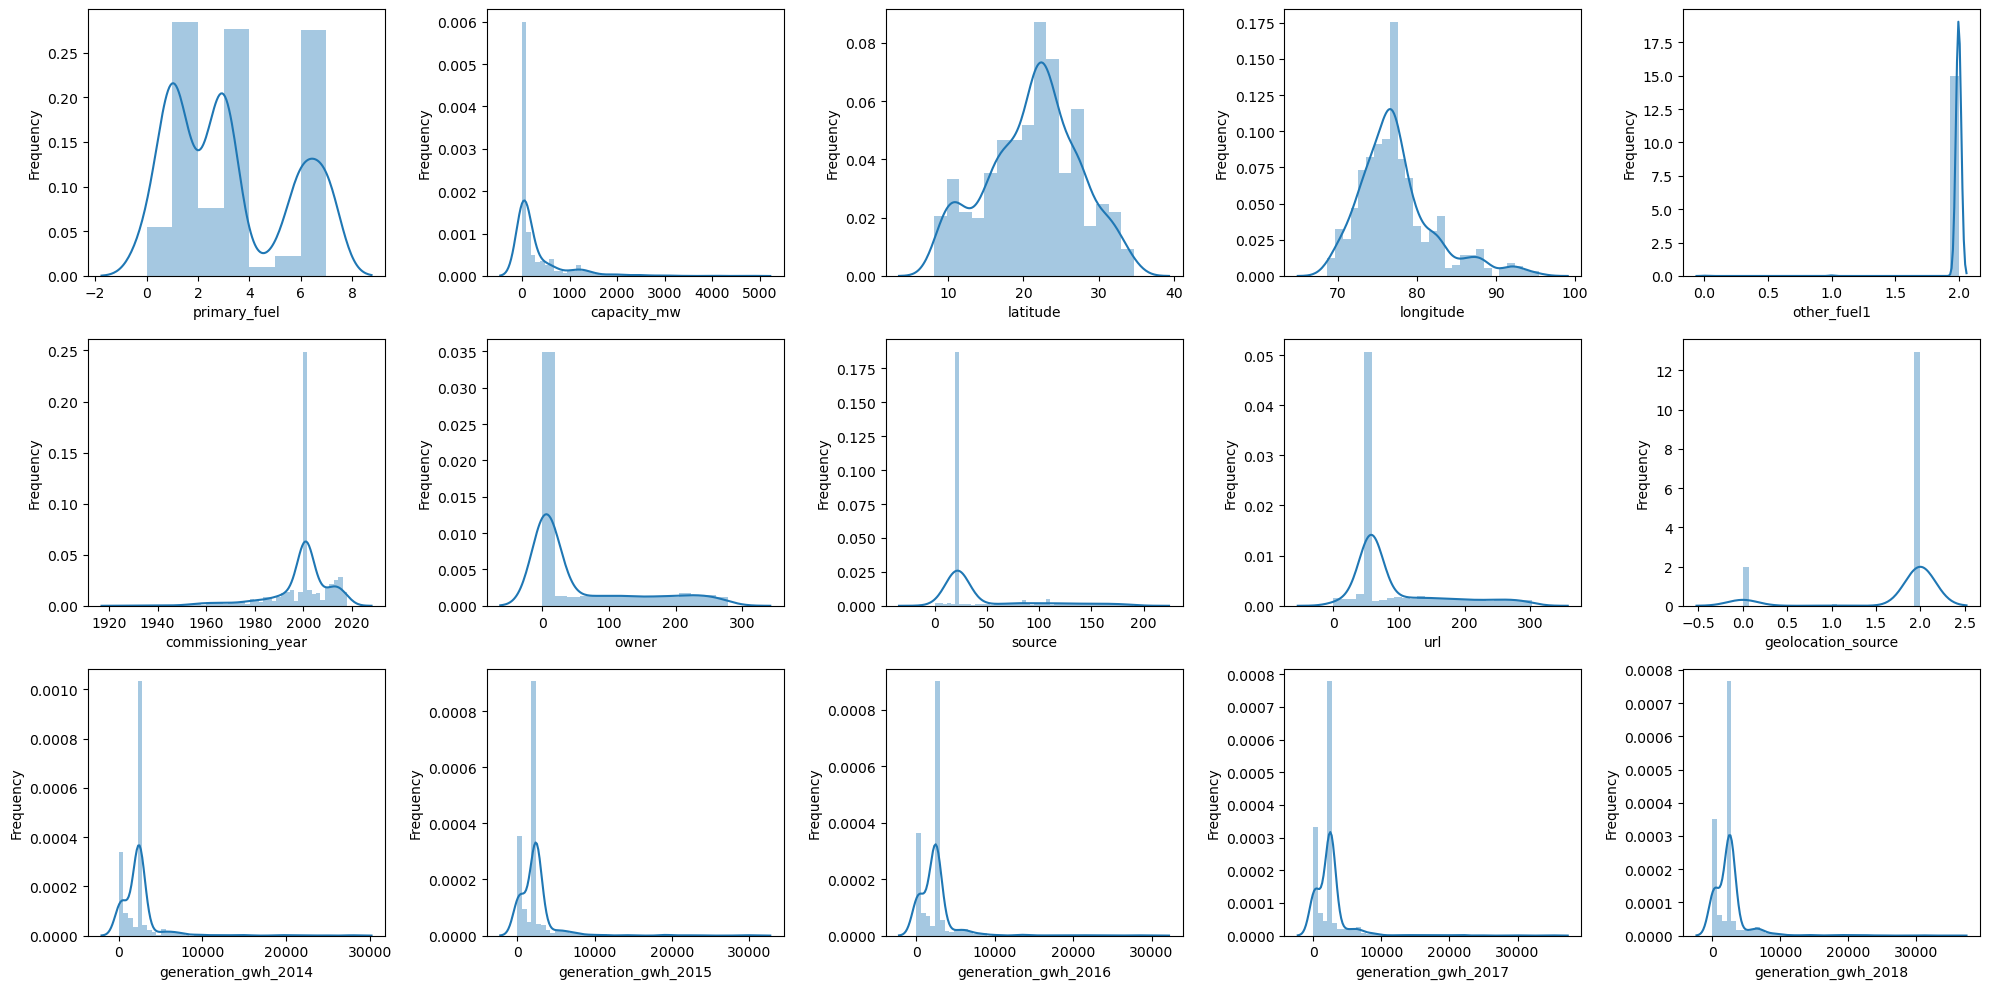

In [21]:
plt.figure(figsize=(20,10))
iterator=1
for i in df.columns:
    if iterator <=16:
        ax=plt.subplot(3,5,iterator)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel("Frequency", fontsize=10)
    iterator+=1
plt.tight_layout()

Summary from above analysis:<br>
1. Data is not evenly spread for most of the columns.<br>
2. For the Target column as well, certain type of primary fuel has more count than others, hence data is not evenly spread.<br>
3. Most of the power plant we commisioned between year 2000 and year 2020<br>
4. Only 1 majority shareholder is there and others are very few<br>
5. We see a huge spike in a single value in every column<br>

## 5.2 Bivariate Analysis

<Axes: >

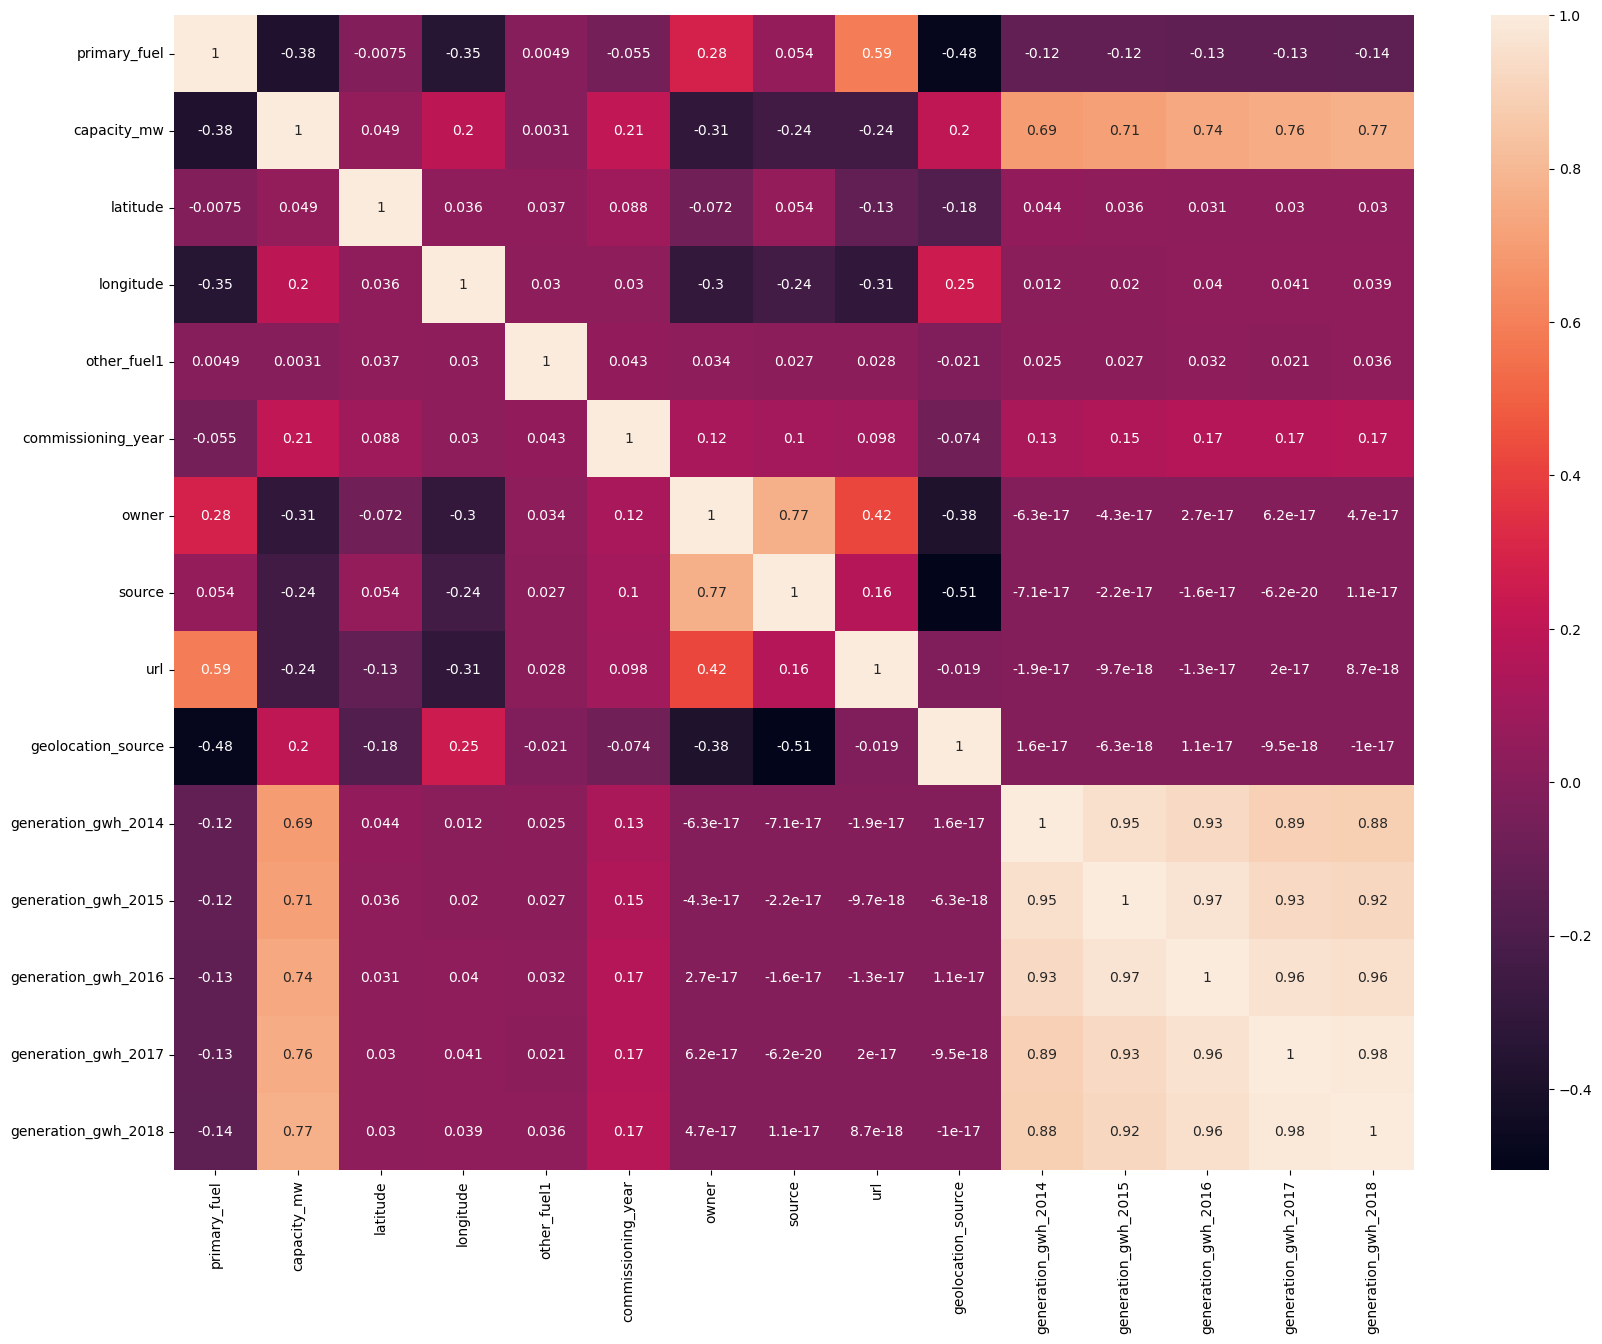

In [22]:
#Checking the correlation among 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

Correlation with primary_fuel(Classification):<br>
1. Highly Correlated : capacity_mw, longitude, url, geolocation_source<br>
2. Mediumly Correlated : owner, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018<br><br>

Correlation with capacity_mw(Regression):<br>
1. Highly correlated : primary_fuel, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018<br>
2. Average correlated : longitude, commissioning_year, source, gelocation_source<br>

Correlation among independant variables<br>

1. latitude : low correlation with almost all columns<br>
2. longtide :medium correlated with primary_fuel, capacity_mw, source, geolocation_source<br>
3. other_fuel1 : low correlation with almost all columns<br>
4. commissioning_year : medium correlated with capacity, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018<br>
5. owner : low correlation with almost all columns<br>
6. source : medium correlation with capacity_mw, longitude, url, geolocation_source<br>
7. url : <br>
a. high correlation with primary_fuel<br>
b. medium correlation with latitude, source <br>
8. geolocation_source : high correlation with primary_fuel, capacity_mw, longitude, source<br>
9. generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 have a high correlation among themselves and with the commisioning_year and capacity_mw<br><br>

We have to select features with below conditions:<br> 
1. Not correlated among independant variables <br>
2. Highly correlated with Target <br>
3. Almost normal distributed<br>
4. Mean~Median<br>
5. Low standard deviation

## 5.3 Checking and Removal of Outliers

### 5.3.1 Checking of Outliers

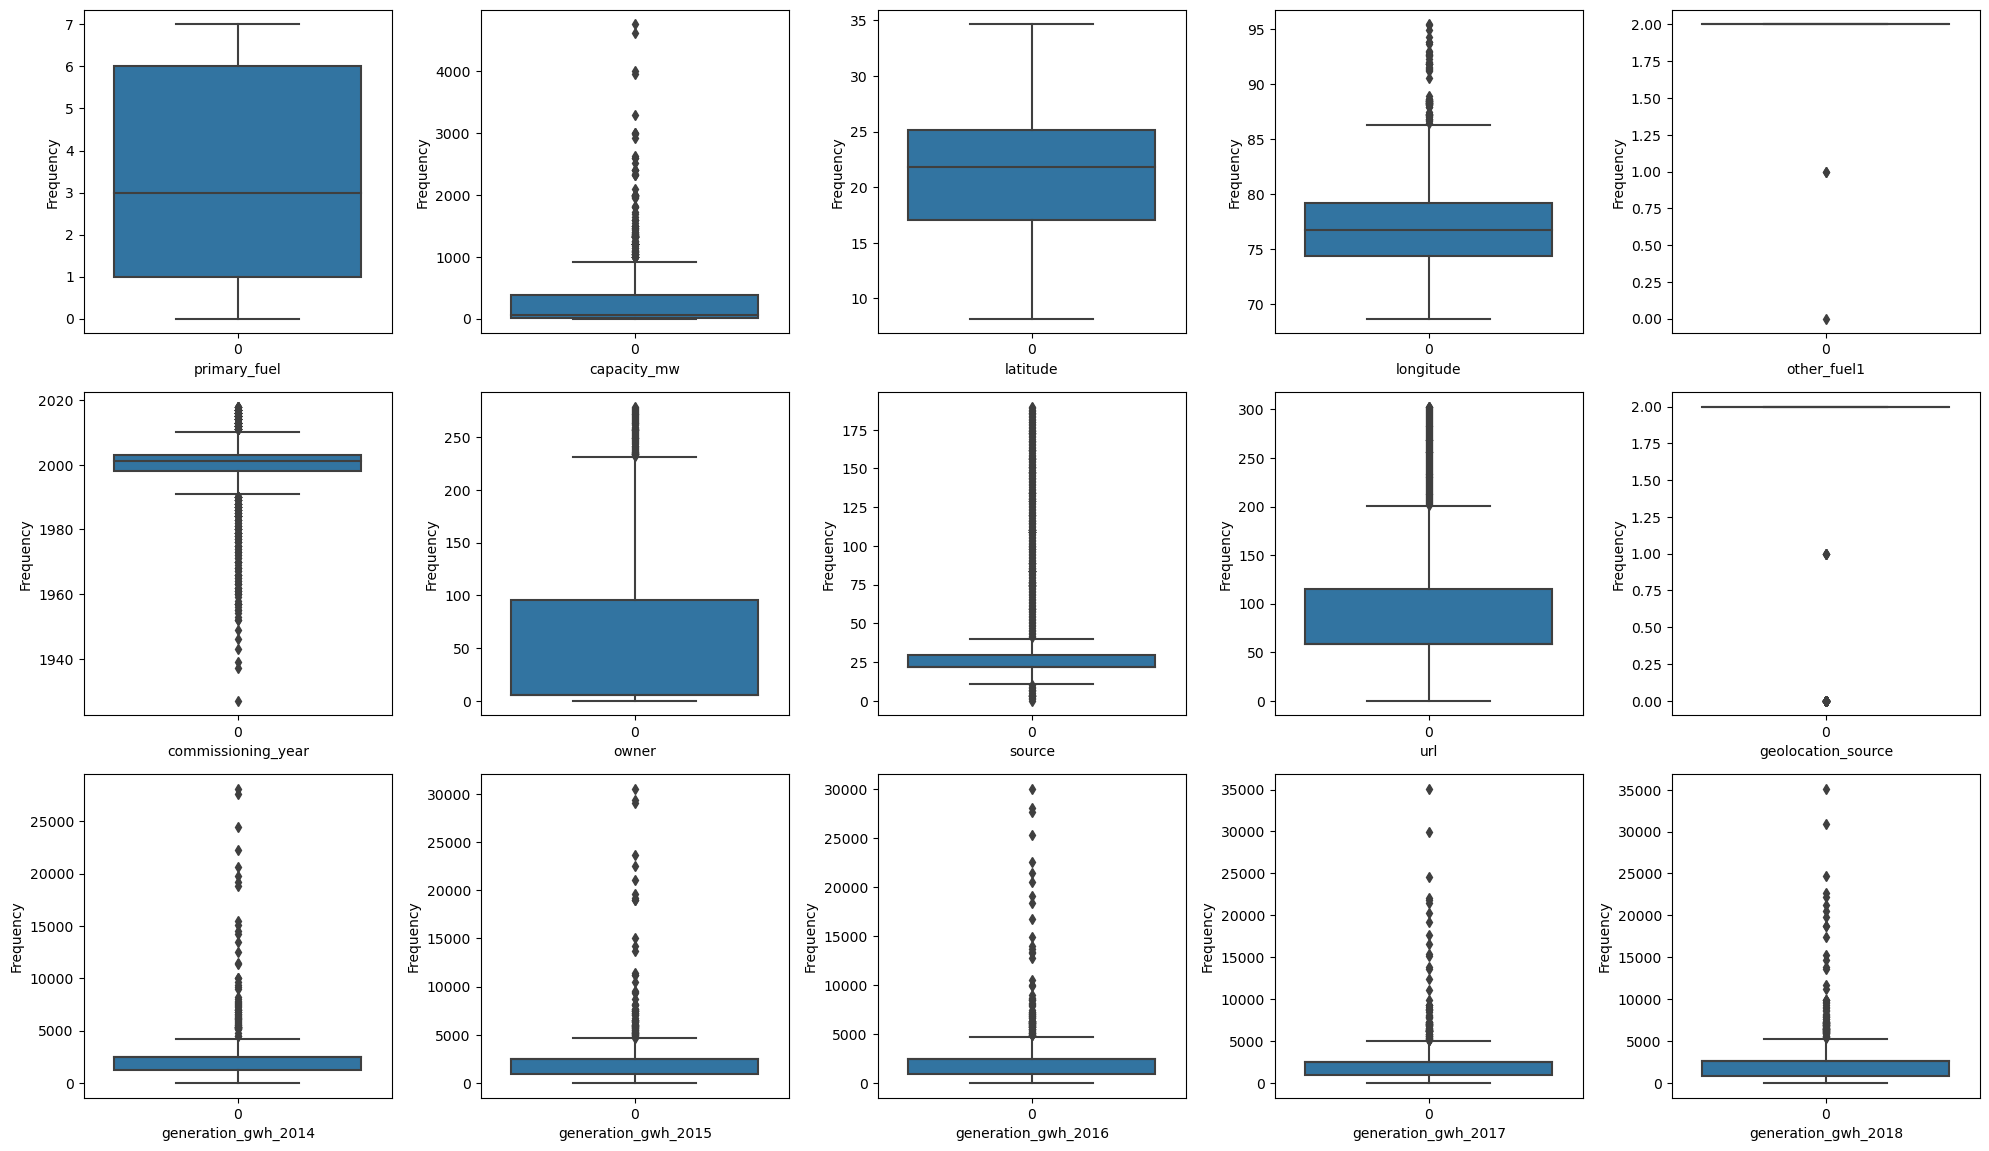

In [23]:
plt.figure(figsize=(20,15))
iterator=1
for i in df.columns:
    if iterator <=17:
        ax=plt.subplot(4,5, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator +=1
plt.tight_layout()

From the above Boxplot :<br>
1. Drop : other_fuel1, geolocation_source<br>
2. Remove outliers from all other columns<br>

### 5.3.2 Removal of Outliers

In [24]:
# Removal of outliers from R, ERA, SHO, SV

for i in ['capacity_mw','longitude','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']:
    q75,q25=np.percentile(df.loc[:,i],[75,25])
    intr_qr=q75-q25
    
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    
    df.loc[df[i]<min,i]=np.nan
    df.loc[df[i]>max,i]=np.nan

In [25]:
df.isnull().sum()

primary_fuel             0
capacity_mw            113
latitude                 0
longitude               62
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
generation_gwh_2014     68
generation_gwh_2015     70
generation_gwh_2016     74
generation_gwh_2017     77
generation_gwh_2018     77
dtype: int64

In [26]:
#Filling the NaN value with the help of SimpleImputer

#We have null value in many columns. We will use SimpleImputer to fill NaN values as per their datatype

from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan, strategy='mean')
list1=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
imp2=SimpleImputer(missing_values=np.nan, strategy='median')
list2=['longitude']

In [27]:
for i in list1:
    df[i]=imp1.fit_transform(df[i].values.reshape(-1,1))
for i in list2:
    df[i]=imp2.fit_transform(df[i].values.reshape(-1,1))

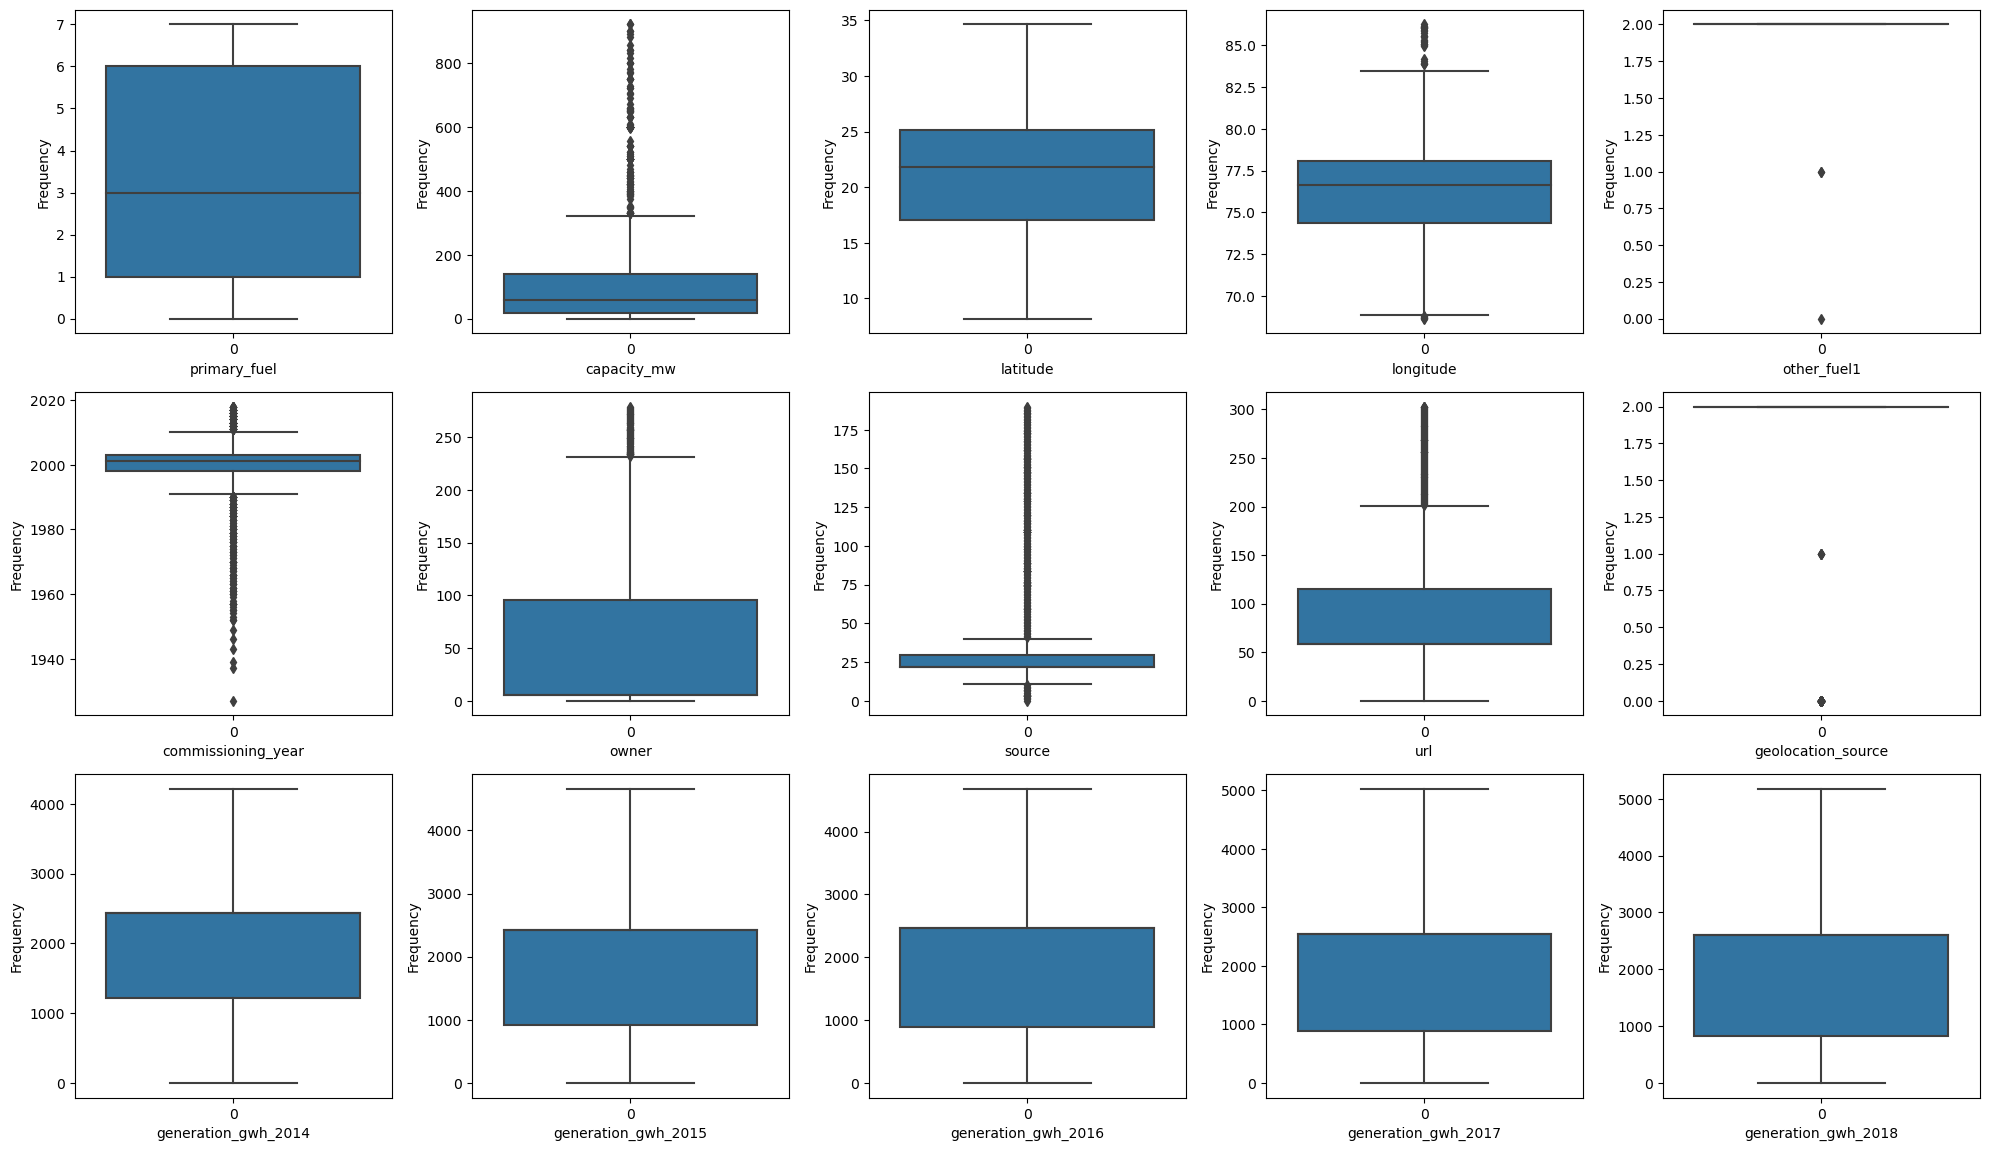

In [28]:
#Checking for Outliers again

plt.figure(figsize=(20,15))
iterator=1
for i in df.columns:
    if iterator <=17:
        ax=plt.subplot(4,5, iterator)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
    iterator +=1
plt.tight_layout()

# 6. Working as per Problem Statement

## 6.1 For Classification dataset (Target is primary_fuel)

## 6.1.1 Selection of Features

In [29]:
x1=df[['capacity_mw','latitude','longitude','owner','url','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
y1=df[['primary_fuel']]

## 6.1.2 Feature Scaling using Standard Feature

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1

,capacity_mw,latitude,longitude,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.716011,1.144693,-0.972573,2.095328,0.476673,-1.083349,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
1,-0.221008,0.582324,-0.567503,2.446913,1.116401,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
2,-0.525785,0.111296,-2.117505,-0.656734,1.571318,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
3,-0.029227,0.435034,0.037808,-0.620363,-0.518459,0.394241,-1.324083,-9.945120e-01,-9.421626e-01,-1.170501e+00,-1.191369e+00
4,0.000000,0.120593,1.741633,-0.620363,-0.518459,0.394241,1.221839,2.267723e-16,-2.213956e-16,-2.136158e-16,2.082643e-16
...,...,...,...,...,...,...,...,...,...,...,...
902,0.000000,-0.811655,0.245954,-0.620363,-0.518459,0.394241,0.586110,-1.835035e+00,-1.577417e+00,-9.810755e-01,-1.136172e+00
903,-0.713420,-1.371409,0.485331,0.701112,-1.030242,-2.560940,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
904,-0.596796,-0.979349,-0.279723,-0.620363,2.353208,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
905,-0.314307,0.513821,-0.822482,0.422268,-0.177271,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01


## 6.1.3 Removing Multicolinearity using Variance Inflation Factor(VIF)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x1.values,i)
                   for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,VIF Values,Features
0,1.275245,capacity_mw
1,1.103184,latitude
2,1.251054,longitude
3,1.631962,owner
4,1.450724,url
5,1.381632,geolocation_source
6,3.922827,generation_gwh_2014
7,4.948241,generation_gwh_2015
8,6.066401,generation_gwh_2016
9,6.045622,generation_gwh_2017


Threshold for VIF = 5, if feature has VIF more than 5 , we will drop that feature.
Since, almost all the features which are higher than 5, it is slightly higher than 5. So we can consider those features

## 6.1.4 Oversampling

In [34]:
#Oversampling the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1new,y1new=SM.fit_resample(x1,y1)

In [36]:
#Checking valuecounts of target column
y1.value_counts()

primary_fuel
1               258
3               251
6               127
7               123
2                69
0                50
5                20
4                 9
dtype: int64

In [37]:
#checking after oversampling is appplied
y1new.value_counts()

primary_fuel
0               258
1               258
2               258
3               258
4               258
5               258
6               258
7               258
dtype: int64

## 6.1.5 Modelling

### 6.1.5.1 Finding best random state model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc=0
maxRs=0
for i in range(1,201):
    x_train,x_test,y_train,y_test=train_test_split(x1new,y1new, test_size=0.2, random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best Accuracy is:", maxAcc)
print("Best random_state:", i)

Best Accuracy is: 0.9418886198547215
Best random_state: 200


### 6.1.5.2 Creating Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x1, y1, test_size=0.2, random_state=200)

### 6.1.5.3 Passing All Models

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [42]:
model = [SVC(), DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,"is:", accuracy_score(y_test,predm))
    print("Confusion Matrix of", m, "is:", confusion_matrix(y_test,predm))
    print("Classification Report of", m, "is:", classification_report(y_test,predm))
    print('\n')

Accuracy Score of SVC() is: 0.8131868131868132
Confusion Matrix of SVC() is: [[ 5  1  0  2  0  0  0  1]
 [ 1 49  0  9  0  0  0  1]
 [ 0  0  2  7  0  0  0  1]
 [ 0  4  0 44  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  1  2  0  0  0  0]
 [ 0  1  0  0  0  0 22  0]
 [ 1  0  0  0  0  0  0 26]]
Classification Report of SVC() is:               precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.86      0.82      0.84        60
           2       0.67      0.20      0.31        10
           3       0.69      0.92      0.79        48
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       1.00      0.96      0.98        23
           7       0.90      0.96      0.93        27

    accuracy                           0.81       182
   macro avg       0.60      0.55      0.56       182
weighted avg       0.80      0.81      0.79       182



Accuracy Score of 

From the above we found that ExtraTreeClassifier has highest accuracy_score

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

etc = ExtraTreesClassifier()

cv_scores = cross_val_score(etc, x1, y1, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores*100)
print("Mean CV score:", np.mean(cv_scores*100))
print("Standard deviation of CV scores:", np.std(cv_scores*100))

Cross-validation scores: [82.41758242 83.51648352 86.74033149 83.42541436 85.63535912]
Mean CV score: 84.34703418128831
Standard deviation of CV scores: 1.5905744091525058


Mean CV score is 84.37 and Standard Deviation is 1.59 which is reflecting that the model is working fine since it has good CV, and low standard deviation from the which is removing the bias-variance 

### 6.1.5.4 Selecting Final Model of Classification Model

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=200)
FinalModel_primary_fuel=ExtraTreesClassifier()
FinalModel_primary_fuel.fit(x_train,y_train)
pred=FinalModel_primary_fuel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(f"Accuracy Score: {acc*100}")

Accuracy Score: 85.71428571428571


Model is 85% accurate 

### 6.1.5.5 Saving Best Model

In [45]:
import joblib
joblib.dump(FinalModel_primary_fuel,"Global_Power_Plant_primary_fuel.pkl")

['Global_Power_Plant_primary_fuel.pkl']

# 6.2 For Regression Dataset (Target is capacity_mw)

## 6.2.1 Selection of Features

In [105]:
x2=df[['primary_fuel','longitude','owner','url','commissioning_year','source','geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
y2=df[['capacity_mw']]

## 6.2.2 Feature Scaling using StandardScaler

In [106]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
x2=pd.DataFrame(scaler1.fit_transform(x2),columns=x2.columns)
x2

,primary_fuel,longitude,owner,url,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.225688,-0.972573,2.095328,0.476673,0.933076,1.460215,-1.083349,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
1,-0.967877,-0.567503,2.446913,1.116401,0.172699,2.917019,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
2,1.664401,-2.117505,-0.656734,1.571318,0.172699,-0.512075,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
3,-0.529164,0.037808,-0.620363,-0.518459,0.400812,-0.489662,0.394241,-1.324083,-9.945120e-01,-9.421626e-01,-1.170501e+00,-1.191369e+00
4,-0.967877,1.741633,-0.620363,-0.518459,1.237227,-0.489662,0.394241,1.221839,2.267723e-16,-2.213956e-16,-2.136158e-16,2.082643e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.967877,0.245954,-0.620363,-0.518459,1.313265,-0.489662,0.394241,0.586110,-1.835035e+00,-1.577417e+00,-9.810755e-01,-1.136172e+00
903,1.225688,0.485331,0.701112,-1.030242,0.172699,0.743019,-2.560940,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
904,1.664401,-0.279723,-0.620363,2.353208,0.172699,-0.512075,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01
905,-0.967877,-0.822482,0.422268,-0.177271,0.172699,0.339596,0.394241,0.586110,5.857772e-01,5.981778e-01,5.994883e-01,6.172461e-01


## 6.2.3 Removing Multicolinearity using Variance Inflation Factor

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif2=pd.DataFrame()
vif2['Values']=[variance_inflation_factor(x2.values,i)
                for i in range(len(x2.columns))]
vif2['Features']=x2.columns
vif2            

,Values,Features
0,3.624975,primary_fuel
1,1.273934,longitude
2,3.354062,owner
3,2.699697,url
4,1.115861,commissioning_year
5,3.911669,source
6,2.977286,geolocation_source
7,3.844196,generation_gwh_2014
8,4.952367,generation_gwh_2015
9,6.025189,generation_gwh_2016


### 6.2.4 Modelling

### 6.2.4.1 Finding best random_state model

In [101]:
#Importing Train_Test_Model and LinearRegression
#Importing metrics

from sklearn.linear_model import LinearRegression
maxScore=0

# 1.Splitting the features(x), in training and testing set with 80% data being sent to training.
# 2. Applying Standard Scaler on training set only.

for i in range(201):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    mscore=LR.score(x_test,y_test)
    if mscore>maxScore:
        maxScore=mscore
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(maxScore*100,randomState))

Best Score = 31.291803899395166 For Random state = 39


### 6.2.4.2 Creating train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2, test_size=0.2, random_state=10)

### 6.2.5 Regression Algorithm

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [104]:
#Creating blank list to append values
r2_Score=[]
Mean_Absolute_Error=[]
Mean_Squared_Error=[]

#Creating list of algorithms
models = [LinearRegression(), ElasticNet(), Lasso(), Ridge(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor(), AdaBoostRegressor()]

#Creating list of alogorithm names
model_names = ["LinearRegression", "ElasticNet", "Lasso", "Ridge", "KNeighborsRegressor","SVR", "DecisionTreeRegressor", "RandomForestRegressor", "ExtraTreesRegressor", "GradientBoostingRegressor", "AdaBoostRegressor"]

#Using loop to iterate and storing the result in table
for m, name in zip(models, model_names):
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    r2 = r2_score(y_test, predm)
    mae = mean_absolute_error(y_test, predm)
    mse = mean_squared_error(y_test, predm)
    
    r2_Score.append(r2)
    Mean_Absolute_Error.append(mae)
    Mean_Squared_Error.append(mse)
    
result_df=pd.DataFrame({
    "Model":model_names,
    "R2 score": r2_Score,
    "Mean Absolute Error": Mean_Absolute_Error,
    "Mean Squared Error": Mean_Squared_Error
})
print(result_df)

                        Model  R2 score  Mean Absolute Error  \
0            LinearRegression  0.308258           109.975693   
1                  ElasticNet  0.306503           110.449875   
2                       Lasso  0.307835           110.051811   
3                       Ridge  0.308256           109.976578   
4         KNeighborsRegressor  0.442433            74.491081   
5                         SVR -0.055277           102.674466   
6       DecisionTreeRegressor  0.348537            75.302269   
7       RandomForestRegressor  0.668798            59.822381   
8         ExtraTreesRegressor  0.662203            58.870980   
9   GradientBoostingRegressor  0.616121            64.396580   
10          AdaBoostRegressor  0.448945           105.557105   

    Mean Squared Error  
0         24454.723748  
1         24516.766672  
2         24469.673585  
3         24454.791555  
4         19711.315128  
5         37306.540838  
6         23030.751788  
7         11708.765304  
8     